In [2]:
import spacy

In [3]:
!python3 -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 24.5 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


# Word Vectors

### What is a word vector?
A word vector (also known as a word embedding) is a way to represent words as numerical vectors in a high-dimensional space.

The idea is that words with similar meanings will have similar vectors.

Traditional text processing methods treat words as discrete entities, which means they can't easily capture the relationships between words. For example, "king" and "queen" are related but are treated as completely separate words. Word vectors allow us to capture semantic meaning and relationships between words.

**Similar words have similar vectors as the values at each index(parameter) are close to the other word's vector**

### Example

`King vector: [ 0.12  0.44  0.55 -0.67  0.12  0.14 -0.22  0.31  0.45  0.10]`

`Queen vector: [ 0.11  0.43  0.54 -0.66  0.11  0.13 -0.21  0.30  0.44  0.09]`

`Man vector: [ 0.34  0.12  0.67 -0.55  0.44  0.56 -0.33  0.21  0.11  0.08]`

`Woman vector: [ 0.33  0.11  0.66 -0.54  0.43  0.55 -0.32  0.20  0.10  0.07]`

**Each dimension (or index) in a word vector does not correspond to a specific, interpretable feature like "royalty" or "gender". Instead, the dimensions are abstract and result from the training process of the word embedding algorithm.**



In [4]:
nlp = spacy.load("en_core_web_md") 

In [5]:
with open("data/wiki_us.txt") as f:
    text = f.read()

In [6]:
doc = nlp(text)
sentence1 = list(doc.sents)[0]
print(sentence1)

The United States of America (U.S.A. or USA), commonly known as the United States (U.S. or US) or America, is a country primarily located in North America.


In [8]:
import numpy as np

your_word = "country"

ms = nlp.vocab.vectors.most_similar(
    np.asarray([nlp.vocab.vectors[nlp.vocab.strings[your_word]]]), n=10)

words = [nlp.vocab.strings[w] for w in ms[0][0]]

distances = ms[2]

print(words)

['country—0,467', 'nationâ\x80\x99s', 'countries-', 'continente', 'Carnations', 'pastille', 'бесплатно', 'Argents', 'Tywysogion', 'Teeters']


# `similarity` method for docs

In [9]:
doc1 = nlp("I like salty fries and hamburgers.")
doc2 = nlp("Fast food tastes very good.")

In [10]:
print(doc1, "<->", doc2, doc1.similarity(doc2))

I like salty fries and hamburgers. <-> Fast food tastes very good. 0.691649353055761


We see in the above case that the sentences are fairly similar.

In [11]:
doc3 = nlp("The Empire State Building is in New York.")

In [12]:
print(doc1, "<->", doc3, doc1.similarity(doc3))

I like salty fries and hamburgers. <-> The Empire State Building is in New York. 0.1766669125394067


In this case, the similarity is pretty low

In [15]:
doc4 = nlp("I like oranges.")
doc5 = nlp("I like apples.")

In [17]:
print(doc4, "<->", doc5, doc4.similarity(doc5))

I like oranges. <-> I like apples. 0.9787322286815502


Once again, a very high similarity since apples and oranges both lie in the same cluster of fruits and the sentence is similarly structured as well.

# spaCy Pipelines

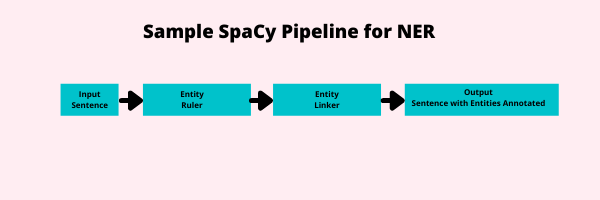

Two pipes are activated on this.

**Entity Ruler**\
A rules-based named entity recognizer known as an EntityRuler which finds entities

**Entity Linker**\
An EntityLinker pipe that identifies what entity that is to perform toponym resolution.

While we can use the `doc.ents` method, we can use pipelines that are more sophisticated.\
We will use the **Tok2Vec** input layer to vectorize the input sentence.